# An√°lise de Dados - Insurance Claim

Para a realiza√ß√£o das an√°lises usarei as seguintes bibliotecas:

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A vari√°vel que conter√° o DataFrame dos dados ser√° chamada de **insurance**:

In [235]:
insurance = pd.read_csv('insurance_claim.csv')

Para adicionar um tema mais est√©tico aos gr√°ficos, usarei o tema padr√£o do Seaborn:

In [236]:
sns.set_theme()

Abaixo est√° um resumo dos dados incluidos no dataset usado:

In [237]:
insurance.head()

ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          INCOME  CREDIT_SCORE VEHICLE_OWNERSHIP VEHICLE_YEAR MARRIED  \
0    upper class      0.629027               yes   after 2015      no   
1        poverty      0.357757                no  before 2015      no   
2  working class      0.493146               yes  before 2015      no   
3  working class      0.206013               yes  before 2015      no   
4  working class      0.388366               yes  before 2015      no   

  CHILDREN  LOCALITY  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  \
0      yes  New York         12000.0        sedan                    0     0   
1       no  New York         16000.0        sedan                    0     0   
2       no  New York         11000.0        sedan                    0     0   
3      yes     Miami         11000.0        sedan                    0     0   
4       no     Miami         12000.0        sedan                    2     0   

   PAST_ACCIDENTS   OUTCOME  
0               0  approved  
1               0    denied  
2               0  approved  
3               0  approved  
4               1    denied

O dataset cont√©m 10.000 dados diferentes, usaremos as informa√ß√µes deles para fazer an√°lises sobre as claims de seguros e tamb√©m haver√° an√°lises socioecon√¥micas poss√≠veis de se fazer com eles.

## An√°lise de features

Na an√°lise de features irei analisar cada uma das vari√°veis do banco de dados (exceto as vari√°veis **outcome** e **ID**), refletindo a respeito de suas distribui√ß√µes e correla√ß√µes para tentar inferir teorias a respeito dos dados.

### Idade

Primeiramente, interessa-me saber qual √© a faixa de idade em que mais ocorrem casos de pedidos de indeniza√ß√£o, e para isso usarei o m√©todo <font color='skyblue'>filter()</font> para correlacionar os <font color='yellow'>ID's</font> com as <font color='yellow'>idades</font>, pois assim ser√° poss√≠vel contabilizar a quantidade de casos em que determinada faixa de idade aparece.

Em seguida, o m√©todo <font color='skyblue'>.groupby()</font> √© usado para ordenar os dados pelas idades

Finalizando, o m√©todo <font color='skyblue'>.count()</font> √© usado para contabilizar os dados relacionados ao groupby (as idades)

In [238]:
insurance.filter(['AGE', 'ID']).groupby('AGE').count()

ID
AGE        
16-25  2016
26-39  3063
40-64  2931
65+    1990

Observando a tabela, percebemos que a faixa de idade em que mais ocorrem pedidos de indeniza√ß√£o √© por volta dos dos 26-39 anos. Mas vale notar tamb√©m que a quantidade de casos √© semelhante √† faixa dos 40-64 anos, mostrando que eventuais danos ao ve√≠culo ocorrem mais tarde na vida do motorista. 

Algumas explica√ß√µes poss√≠veis s√£o devido √† vida-√∫til do autom√≥vel (em casos de descuido da mec√¢nica do ve√≠culo), estresse no trabalho do indiv√≠duo... at√© mesmo crise de meia-idade (como por exemplo comprar carros luxuosos e sofrer um assalto), dentre outras explica√ß√µes.

Para verificarmos se a suposi√ß√£o sobre a vida-√∫til do ve√≠culo, podemos fazer um gr√°fico contabilizando a quantidade de casos em que a data do carro √© de antes/depois de 2015 ordenado pelas idades, como o gr√°fico abaixo:

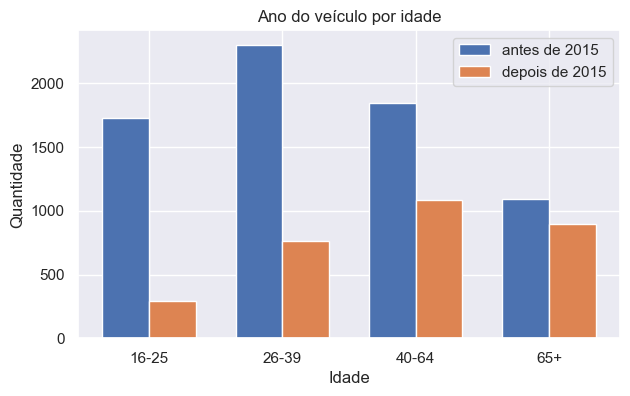

In [239]:
ages = insurance['AGE'].unique() #Recebe todos os tipos de idade
ages.sort() #Ordena os tipos de idade

before2015 = insurance[insurance['VEHICLE_YEAR'] == "before 2015"].groupby('AGE').count()['ID'] #Conta a quantidade de ve√≠culos antes de 2015 por idade
after2015 = insurance[insurance['VEHICLE_YEAR'] == "after 2015"].groupby('AGE').count()['ID'] #Conta a quantidade de ve√≠culos depois de 2015 por idade

values = np.arange(len(ages)) #Cria um array com o tamanho do array de idades
width = 0.35 #Largura das barras

plt.figure(figsize=(7,4)) #Define o tamanho da figura
plt.bar(values, before2015, width, label='antes de 2015') #Cria a barra relacionada aos dados de antes de 2015
plt.bar(values + width, after2015, width, label='depois de 2015') #Cria a barra relacionada aos dados de depois de 2015

plt.title("Ano do ve√≠culo por idade") #Define o t√≠tulo do gr√°fico
plt.ylabel('Quantidade') #Define o t√≠tulo do eixo y
plt.xlabel('Idade') #Define o t√≠tulo do eixo x
plt.xticks(values + width / 2, ages) #Define o posicionamento dos valores do eixo x
plt.legend() #Adiciona a legenda
plt.show() #Mostra o gr√°fico

Podemos confirmar ent√£o que a vida-√∫til do ve√≠culo √© relevante para o n√∫mero de acidentes, visto que a faixa-et√°ria que tinha mais pedidos de indeniza√ß√£o (26-39) √© a que mais possui ve√≠culos com ano antes de 2015.

Um fato a ser observado tamb√©m √© que a faixa em que ocorrem menos pedidos de indeniza√ß√£o √© de 65 anos pra cima, que √© a idade da aposentadoria do indiv√≠duo, indicando que pessoas mais velhas tendem a dirigir menos, talvez devido ao agravamento de doen√ßas que dificultem a atividade, como por exemplo a s√≠ndrome de Parkinson.

#### Rela√ß√£o Estado Civil x Idade

Uma an√°lise interessante para se fazer √© sobre a rela√ß√£o de idade/casamentos, podemos ver no gr√°fico abaixo que a faixa de idade em que h√° mais pessoas casadas √© dos 40-64 anos. Por√©m, ao chegar na numa faixa et√°ria maior, h√° menos pessoas casadas, o que significa que casais se tornaram vi√∫vos :(.

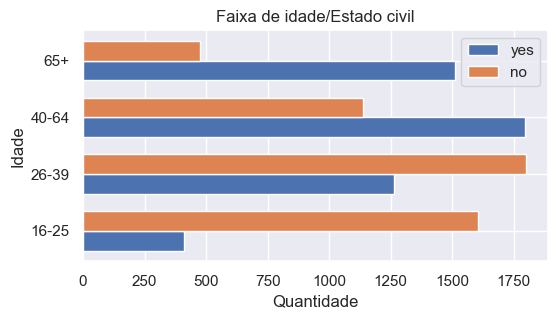

In [240]:
married = insurance[insurance['MARRIED'] == 'yes'].groupby('AGE').count()['ID']
notmarried = insurance[insurance['MARRIED'] == 'no'].groupby('AGE').count()['ID']

values = np.arange(len(ages))
width = 0.35

plt.figure(figsize=(6,3))
plt.barh(values, married, width, label='yes') #Cria a barra horizontal relacionada aos dados de pessoas casadas
plt.barh(values + width, notmarried, width, label='no') #Cria a barra horizontal relacionada aos dados de pessoas n√£o casadas

plt.title("Faixa de idade/Estado civil")
plt.xlabel('Quantidade')
plt.ylabel('Idade')
plt.yticks(values + width / 2, ages)
plt.legend()
plt.show()

#### Rela√ß√£o Idade x Renda

Por termos de curiosidade podemos ver tamb√©m a rela√ß√£o entre a <font color=yellow>idade</font> dos indiv√≠duos e suas <font color=yellow>rendas</font>:

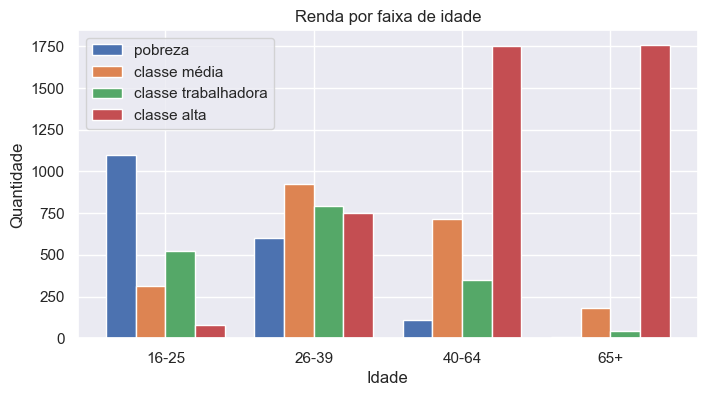

In [241]:
income1 = insurance[insurance['INCOME'] == 'poverty'].groupby('AGE').count()['ID']
income2 = insurance[insurance['INCOME'] == 'middle class'].groupby('AGE').count()['ID']
income3 = insurance[insurance['INCOME'] == 'working class'].groupby('AGE').count()['ID']
income4 = insurance[insurance['INCOME'] == 'upper class'].groupby('AGE').count()['ID']

values = np.arange(len(ages))
width = 1/5

plt.figure(figsize=(8,4))
plt.bar(values, income1, width, label='pobreza')
plt.bar(values + width, income2, width, label='classe m√©dia')
plt.bar(values + 2*width, income3, width, label='classe trabalhadora')
plt.bar(values + 3*width, income4, width, label='classe alta')

plt.title("Renda por faixa de idade")
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.xticks(values + 3*width/2, ages)
plt.legend()
plt.show()


O gr√°fico acima mostra a quantidade de casos relacionados ao tipo de renda agrupado pelas faixas-et√°rias.

Como podemos ver no gr√°fico de linhas acima, a idade em que apresenta mais pessoas com a classe alta √© dos 40 anos pra cima, junto tamb√©m com os menores casos de pobreza. Isso pode-se dar devido ao sucesso na vida profissional dos indiv√≠duos e tamb√©m √† aposentadoria.

#### Rela√ß√£o Idade x Tipo de Carro

Podemos tamb√©m analisar quais s√£o os gostos preferenciais quanto ao <font color=yellow>tipo de carro</font> dos indiv√≠duos pela <font color=yellow>idade</font>:

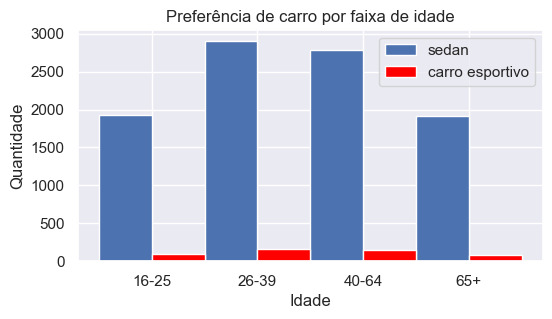

In [242]:
car1 = insurance[insurance['VEHICLE_TYPE'] == 'sedan'].groupby('AGE').count()['ID']
car2 = insurance[insurance['VEHICLE_TYPE'] == 'sports car'].groupby('AGE').count()['ID']

values = np.arange(len(ages))
width = 0.5

plt.figure(figsize=(6,3))
plt.bar(values, car1, width, label='sedan')
plt.bar(values + width, car2, width, label='carro esportivo', color='red')

plt.title("Prefer√™ncia de carro por faixa de idade")
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.xticks(values + width/2, ages)
plt.legend()
plt.show()

A escolha por um Sedan √© a escolha majorit√°ria entre os indiv√≠duos, tanto por ser um carro de baixo custo e popular entre as pessoas, como diz uma not√≠cia do Uol feita em 2021: <a href="https://www.uol.com.br/carros/noticias/redacao/2021/06/23/por-que-carros-populares-nos-eua-viram-modelos-de-luxo-no-brasil.htm">Por que carros 'populares' nos EUA viram modelos de luxo no Brasil</a>.

A compra de um carro esportivo se d√° mais preferencialmente na meia-idade, onde inclusive acontece a famosa "Crise de meia-idade", momento em que pessoas adquirem frustra√ß√£o e ansiedade pelo pensamento de n√£o ter aproveitado a vida o suficiente. 

#### Rela√ß√£o Idade x DUIS

O crime DUI, Driving Under the Influence (em portugu√™s "Dirigir sob influ√™ncia"), √© o crime cometido quando se dirige sob influ√™ncia alc√≥olica ou de drogas.  Os estatutos variam de acordo com cada estado norte-americano, por√©m a varia√ß√£o do n√≠vel o qual uma pessoa pode dirigir em seguran√ßa ou n√£o √© de 0,08 a 0,10 gramas de √°lcool.

No nosso dataset temos a vari√°vel referente ao n√∫mero de infra√ß√µes cometidas pelo segurado por embriaguez ao volante, vamos analisar em qual idade mais ocorre esse crime:

[Text(0.5, 0, 'Idade'),
 Text(0, 0.5, 'Quantidade de infra√ß√µes DUI'),
 Text(0.5, 1.0, 'N√∫mero de infra√ß√µes DUI por idade')]

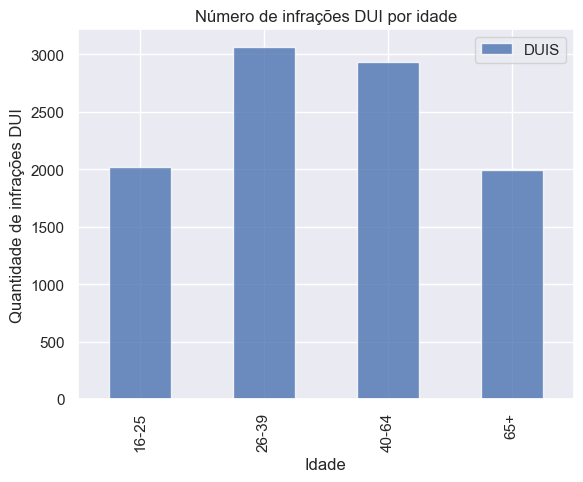

In [243]:
insurance.filter(['AGE', 'DUIS']).groupby('AGE').count().plot(kind='bar', alpha=0.8, grid=True).set(xlabel='Idade', ylabel='Quantidade de infra√ß√µes DUI', title='N√∫mero de infra√ß√µes DUI por idade') #o m√©todo set() permite definir o t√≠tulo do gr√°fico e dos eixos x e y

Analisando a tabela vemos que as faixas-et√°rias de 26-39 e 40-64 s√£o as que mais acumularam DUIS, e as faixas de pessoas jovens e idosas ficam bem equiparadas.

Para fazermos uma compara√ß√£o entre as quantidades, podemos usar os dados da tabela abaixo e fazer uma propor√ß√£o da **DUIS cometidas pela faixa-et√°ria 26-39** pelas **DUIS cometidas pela faixa-et√°ria 16-25**:

In [244]:
insurance.filter(['AGE', 'DUIS']).groupby('AGE').count()

DUIS
AGE        
16-25  2016
26-39  3063
40-64  2931
65+    1990

In [245]:
k = 100*(3063/2016)
print("A propor√ß√£o √©: " + str(round(k,2)) + "%")

A propor√ß√£o √©: 151.93%


Ou seja, os adultos de 26-39 anos bebem 51.93% mais do que os jovens de 16-25. E essa quantidade de DUIS revela o descuido por parte dos adultos com bebidas √°lcoolicas ao dirigir.

### G√™nero

Para verificar a variabilidade de dados em rela√ß√£o ao g√™nero, irei usar o mesmo m√©todo utilizado na an√°lise das <font color=yellow>idades</fonts>:

In [246]:
insurance.filter(['GENDER', 'ID']).groupby('GENDER').count()

ID
GENDER      
female  5010
male    4990

Podemos verificar que os dados est√£o igualitariamente distribuidos entre os <font color=yellow>g√™neros</font>, portanto n√£o √© poss√≠vel inferirmos alguma afirma√ß√£o quanto a esses dados individualmente. 

#### Rela√ß√£o G√™nero x Renda

Outra an√°lise socioecon√¥mica poss√≠vel de se fazer √© a rela√ß√£o do <font color=yellow>g√™nero</font> com a <font color=yellow>renda</font>:

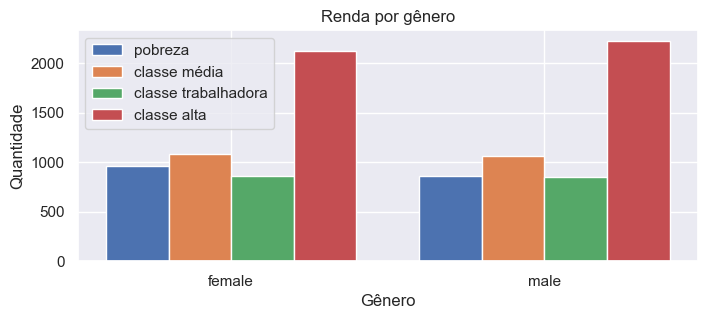

In [247]:
genders = insurance['GENDER'].unique()
genders.sort()

income1 = insurance[insurance['INCOME'] == 'poverty'].groupby('GENDER').count()['ID']
income2 = insurance[insurance['INCOME'] == 'middle class'].groupby('GENDER').count()['ID']
income3 = insurance[insurance['INCOME'] == 'working class'].groupby('GENDER').count()['ID']
income4 = insurance[insurance['INCOME'] == 'upper class'].groupby('GENDER').count()['ID']

values = np.arange(len(genders))
width = 1/5

plt.figure(figsize=(8,3))
plt.bar(values, income1, width, label='pobreza')
plt.bar(values + width, income2, width, label='classe m√©dia')
plt.bar(values + (2*width), income3, width, label='classe trabalhadora')
plt.bar(values + (3*width), income4, width, label='classe alta')

plt.title("Renda por g√™nero")
plt.ylabel('Quantidade')
plt.xlabel('G√™nero')
plt.xticks(values + 3*width/2, genders)
plt.legend()
plt.show()


Neste gr√°fico, onde as pessoas identificadas como do g√™nero feminino est√£o √† esquerda e as do g√™nero masculino √† direita, √© poss√≠vel notar uma diferen√ßa em rela√ß√£o √† classe alta e a pobreza entre os g√™neros, onde existem mais homens na classe alta do que mulheres e, ao mesmo tempo, existem mais mulheres em situa√ß√£o de pobreza do que homens na mesma.

#### Rela√ß√£o G√™nero x Acidentes Passados

Nessa rela√ß√£o vamos investigar qual <font color=yellow>g√™nero</font> possui mais hist√≥rico de <font color=yellow>acidentes passados</font>:

Para isso usarei o m√©todo <font color='skyblue'>histplot()</font> para contabilizar a quantidade de acidentes passados de acordo com o g√™nero:

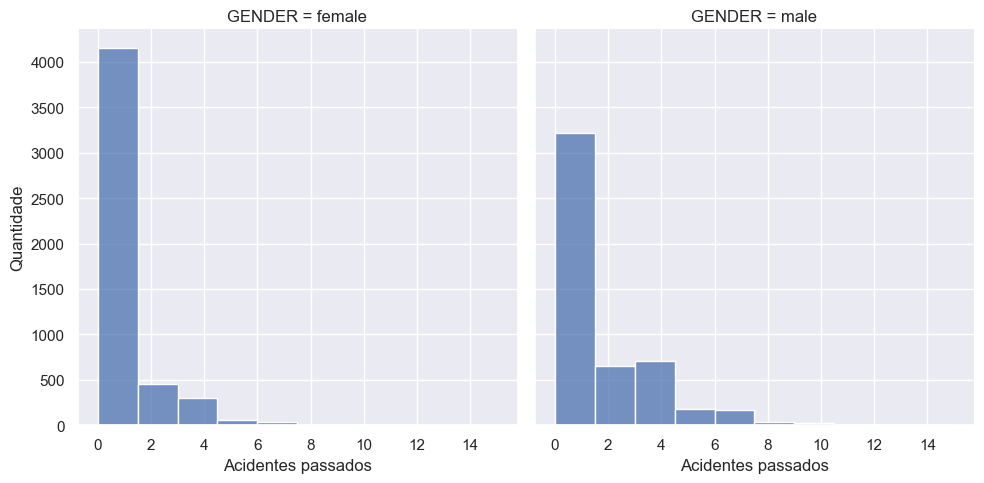

In [248]:
g = sns.FacetGrid(insurance, col='GENDER', height=5) ##O FacetGrid serve para criarmos m√∫ltiplos gr√°ficos, um ao lado do outro
g.map(sns.histplot, 'PAST_ACCIDENTS', binwidth=1.5, bins=20).set(xlabel='Acidentes passados', ylabel='Quantidade') ##O map serve para aplicarmos uma fun√ß√£o em cada um dos gr√°ficos

O gr√°fico √† esquerda representa os acidentes passados dos indiv√≠duos declarados como mulheres e o gr√°fico √† direita o dos declarados como homens. √â not√≥ria a diferen√ßa entre as precau√ß√µes no transito em rela√ß√£o aos g√™neros. Enquanto as mulheres possuem raros casos de at√© 6 acidentes passados, os homens chegam a at√© 10 acidentes. Mostrando que os homens s√£o mais descuidados ao dirigir.

### Etnia

Na an√°lise das etnias o gr√°fico mostrar√° a diferen√ßa de distribui√ß√£o entre a etnia majorit√°ria e a etnia minorit√°ria por um gr√°fico de pizza:

Usaremos o par√¢metro <font color='skyblue'>autopct</font> para mostrar a porcentagem de cada etnia no gr√°fico.

Tamb√©m usaremos o par√¢metro <font color='skyblue'>startangle</font> para o gr√°fico come√ßar a ser desenhado a partir de 90 graus.

E por √∫ltimo o par√¢metro <font color='skyblue'>explode</font> para destacar a etnia minorit√°ria do gr√°fico.

Text(0.5, 1.0, 'Propor√ß√£o de etnia')

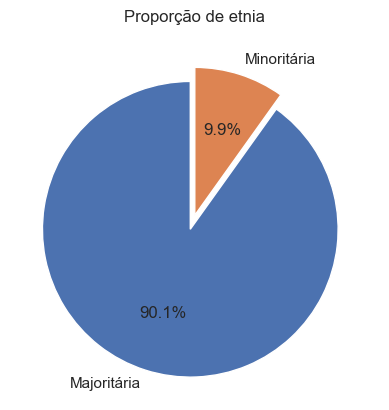

In [249]:
plt.pie(insurance.filter(['RACE', 'ID']).groupby('RACE').count()['ID'], labels=['Majorit√°ria', 'Minorit√°ria'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0)) #O autopct serve para mostrar os valores percentuais no gr√°fico, o startangle serve para definir o √¢ngulo inicial do gr√°fico, o explode serve para destacar uma parte do gr√°fico

plt.title("Propor√ß√£o de etnia")

Vendo tanto pelo gr√°fico pela tabela, podemos notar que a etnia majorit√°ria aparece cerca de 9 vezes mais do que a minorit√°ria.

#### Rela√ß√£o Etnia x Educa√ß√£o

Uma an√°lise socioecon√¥mica poss√≠vel de se realizar √© a rela√ß√£o entre a <font color=yellow>etnia</font> e a <font color=yellow>educa√ß√£o</font> dos indiv√≠duos, para termos uma ideia se a etnia √© um fator relevante quanto ao ensino do cidad√£o. O gr√°fico abaixo mostra a quantidade de ensinos registrados em cada etnia:

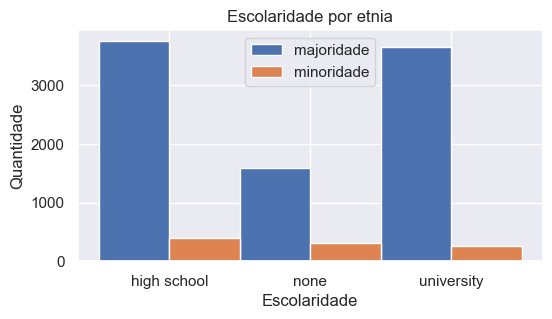

In [250]:
education = insurance['EDUCATION'].unique()

raceMajor = insurance[insurance['RACE'] == 'majority'].groupby('EDUCATION').count()['ID']
raceMinor = insurance[insurance['RACE'] == 'minority'].groupby('EDUCATION').count()['ID']

values = np.arange(len(education))
width = 0.5

plt.figure(figsize=(6,3))
plt.bar(values, raceMajor, width, label='majoridade')
plt.bar(values + width, raceMinor, width, label='minoridade')

plt.title("Escolaridade por etnia")
plt.ylabel('Quantidade')
plt.xlabel('Escolaridade')
plt.xticks(values + width/2, education)
plt.legend()
plt.show()


Por√©m n√£o √© efetivo compararmos as quantidades das duas etnias, dado que uma possui bem mais registros do que a outra. Portanto, usarei propor√ß√µes para dizer o percentual de escolaridade de cada etnia, a come√ßar pelo **grupo majorit√°rio**:

In [251]:
print(insurance[insurance['RACE'] == 'majority'].groupby('EDUCATION').count()['ID'])

EDUCATION
high school    3755
none           1596
university     3661
Name: ID, dtype: int64


Vemos que nesse grupo 1596 pessoas n√£o possuem escolaridade, 3755 possuem ensino m√©dio completo e 3661 possuem gradua√ß√£o numa universidade. Usaremos esses dados na f√≥rmula da propor√ß√£o, que ser√° dada por:

$$N_{i}/N_{total}$$
**Onde:** 

$N_{i}$ = quantidade de pessoas com escolaridade $i$; 

$N_{total}$ = quantidade de pessoas total do grupo

*OBS:* o resultado ser√° arredondado para at√© duas casas decimais, para uma visualiza√ß√£o mais est√©tica dos resultados.

In [252]:
num = 9012 #n√∫mero de pessoas da ra√ßa majorit√°ria
print("Propor√ß√£o de alunos de ra√ßa majorit√°ria sem ensino: " + str(round(100*(1596/num),2)) + "%")
print("Propor√ß√£o de alunos de ra√ßa majorit√°ria com ensino m√©dio completo: " + str(round(100*(3755/num),2)) + "%")
print("Propor√ß√£o de alunos de ra√ßa majorit√°ria com universidade completa: " + str(round(100*(3661/num),2)) + "%")

Propor√ß√£o de alunos de ra√ßa majorit√°ria sem ensino: 17.71%
Propor√ß√£o de alunos de ra√ßa majorit√°ria com ensino m√©dio completo: 41.67%
Propor√ß√£o de alunos de ra√ßa majorit√°ria com universidade completa: 40.62%


Vemos que cerca de 82,29% (41,67% + 40,62%) dos indiv√≠duos de ra√ßa majorit√°ria possuem pelo menos uma escolaridade.

Agora partiremos para as propor√ß√µes do **grupo minorit√°rio**:

In [253]:
print(insurance[insurance['RACE'] == 'minority'].groupby('EDUCATION').count()['ID'])

EDUCATION
high school    402
none           319
university     267
Name: ID, dtype: int64


In [254]:
num = 988
print("Propor√ß√£o de alunos de ra√ßa minorit√°ria sem ensino: " + str(round(100*(319/num),2)) + "%")
print("Propor√ß√£o de alunos de ra√ßa minorit√°ria com ensino m√©dio completo: " + str(round(100*(402/num),2)) + "%")
print("Propor√ß√£o de alunos de ra√ßa minorit√°ria com universidade completo: " + str(round(100*(267/num),2)) + "%")

Propor√ß√£o de alunos de ra√ßa minorit√°ria sem ensino: 32.29%
Propor√ß√£o de alunos de ra√ßa minorit√°ria com ensino m√©dio completo: 40.69%
Propor√ß√£o de alunos de ra√ßa minorit√°ria com universidade completo: 27.02%


Vemos que cerca de 67,71% (40,69% + 27,02%) dos indiv√≠duos de ra√ßa minorit√°ria possuem pelo menos uma escolaridade.

Podemos observar ent√£o que a etnia √© realmente um fator relevante no fator da escolaridade, dado que o grupo da ra√ßa minorit√°ria obteve uma propor√ß√£o menor em rela√ß√£o ao outro grupo.

### Experi√™ncia em dirigir

Ao analisarmos a quantidade de pedidos de indeniza√ß√£o pela <font color='yellow'>experi√™ncia em dirigir</font> do motorista, logicamente e visualmente poderemos observar que conforme o indiv√≠duo tem mais experi√™ncia, menos acidentes acontecem. Como mostra o gr√°fico abaixo:

<Axes: title={'center': 'Quantidade de cada experi√™ncia de condu√ß√£o'}, xlabel='Experi√™ncia de condu√ß√£o', ylabel='Quantidade'>

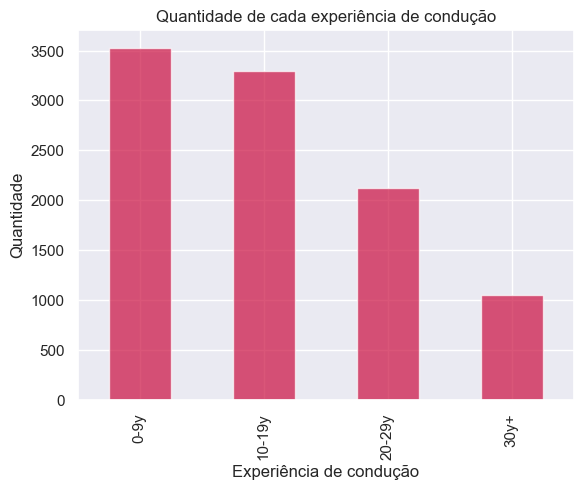

In [255]:
accidents = insurance.filter(['DRIVING_EXPERIENCE', 'ID']).groupby('DRIVING_EXPERIENCE').count()['ID']
accidents.plot(kind='bar', color='#cb0e40', alpha=0.7, grid=True, xlabel='Experi√™ncia de condu√ß√£o', ylabel='Quantidade', title='Quantidade de cada experi√™ncia de condu√ß√£o')

### Escolaridade

Agora iremos analisar o fator da escolaridade no nosso dataset, vamos come√ßar com a quantidade de indiv√≠duos que possuem cada tipo de <font color='yellow'>escolaridade</font>:

([<matplotlib.axis.XTick at 0x16e02312070>,
 [Text(0, 0, 'Ensino m√©dio completo'),
  Text(1, 0, 'Ensino m√©dio incompleto'),
  Text(2, 0, 'Ensino superior completo')])

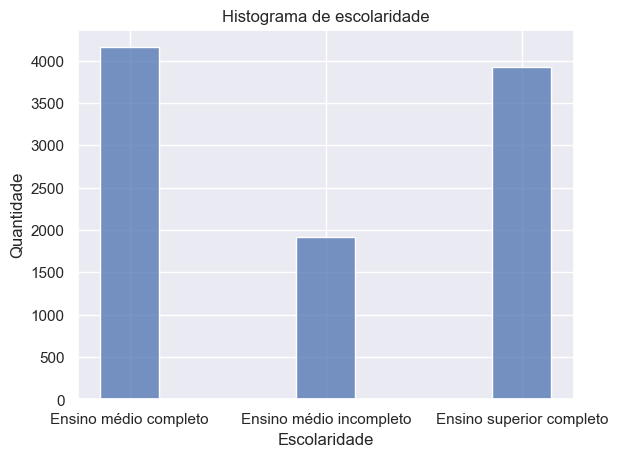

In [256]:
sns.histplot(insurance, x='EDUCATION', shrink=0.3).set(title='Histograma de escolaridade', xlabel='Escolaridade', ylabel='Quantidade')

plt.xticks([0,1,2], ['Ensino m√©dio completo', 'Ensino m√©dio incompleto', 'Ensino superior completo'])

Podemos ver que a maioria dos indiv√≠duos possuem ensino m√©dio completo, seguido de ensino superior completo e por √∫ltimo, ensino m√©dio incompleto. Isso acontece porque para obter uma carteira de motorista √© necess√°rio ser alfabetizado, e pessoas que n√£o possuem a escolaridade completa t√™m mais dificuldade quanto ao aprendizado da leitura e escrita.

#### Rela√ß√£o Escolaridade x Renda x Posse de Ve√≠culo

Nesta rela√ß√£o iremos analisar se os fatores <font color='yellow'>escolaridade</font>, <font color='yellow'>renda</font> e <font color='yellow'>posse de ve√≠culo</font> est√£o relacionados entre si. Para isso, organizaremos os dados pela escolaridade, contaremos o n√∫mero de casos de cada renda (linhas) e contaremos o n√∫mero de casos de se o indiv√≠duo √© propriet√°rio do ve√≠culo (barras): 

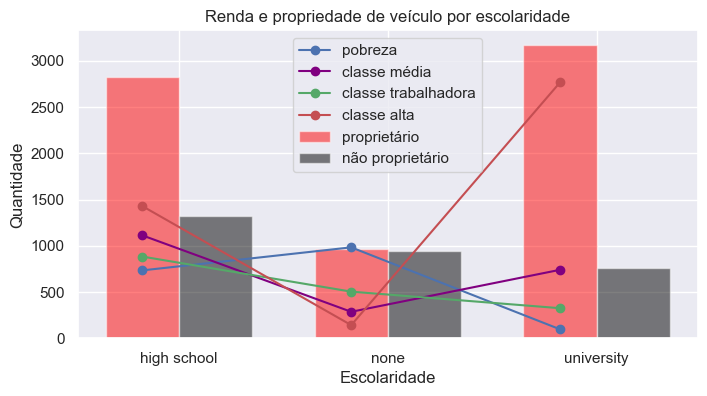

In [257]:
education = insurance['EDUCATION'].unique()

income1 = insurance[insurance['INCOME'] == 'poverty'].groupby('EDUCATION').count()['ID']
income2 = insurance[insurance['INCOME'] == 'middle class'].groupby('EDUCATION').count()['ID']
income3 = insurance[insurance['INCOME'] == 'working class'].groupby('EDUCATION').count()['ID']
income4 = insurance[insurance['INCOME'] == 'upper class'].groupby('EDUCATION').count()['ID']

yesOwner = insurance[insurance['VEHICLE_OWNERSHIP'] == 'yes'].groupby('EDUCATION').count()['ID']
noOwner = insurance[insurance['VEHICLE_OWNERSHIP'] == 'no'].groupby('EDUCATION').count()['ID']

values = np.arange(len(education))
width = 0.35

plt.figure(figsize=(8,4))
plt.plot(values, income1, color='b', marker='o', label='pobreza')
plt.plot(values, income2, color='purple', marker='o', label='classe m√©dia')
plt.plot(values, income3, color='g', marker='o', label='classe trabalhadora')
plt.plot(values, income4, color='r', marker='o',label='classe alta')

plt.bar(values, yesOwner, width, alpha=0.5, color='red', label='propriet√°rio')
plt.bar(values + width, noOwner, width, alpha=0.5, color='black', label='n√£o propriet√°rio')

plt.title("Renda e propriedade de ve√≠culo por escolaridade")
plt.ylabel('Quantidade')
plt.xlabel('Escolaridade')
plt.xticks(values + width/2, education)
plt.legend()
plt.show()

Podemos ver que a rela√ß√£o entre a renda e a propriedade do ve√≠culo √© diretamente proporcional, ou seja, quanto maior a renda, maior a probabilidade de o indiv√≠duo possuir um ve√≠culo, e vice-versa. Podemos notar isso analisando que o caso em que h√° mais pobreza (quando a escolaridade √© incompleta) √© o caso em que h√° menos propriedade de ve√≠culo.

Ademais, pessoas com universidade completa s√£o caracter√≠sticas por terem o maior √≠ndice de classe alta, e tamb√©m possuem o maior √≠ndice de propriedade de ve√≠culo. O contr√°rio tamb√©m vale: pessoas com nenhuma escolaridade s√£o caracter√≠sticas por terem o maior √≠ndice de pobreza.

### Renda

Quando analisamos o histograma da <font color='yellow'>renda</font> dos indiv√≠duos, podemos descobrir qual √© a renda que mais teve pedidos de indeniza√ß√£o:

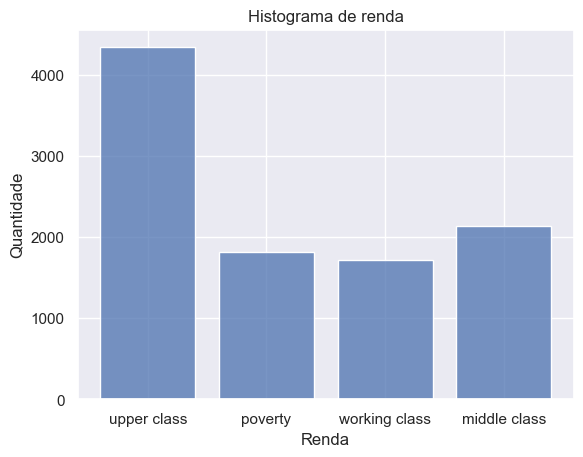

In [258]:
sns.histplot(insurance, x='INCOME', shrink=0.8).set(title='Histograma de renda', xlabel='Renda', ylabel='Quantidade')
sns.set_palette("Spectral")

Nesse caso, as pessoas com a renda de classe alta foram as que mais pediram indeniza√ß√£o. Isso pode ser explicado pelo fato de que pessoas com renda alta possu√≠rem mais condi√ß√µes de pagar pelo seguro do ve√≠culo.

#### Rela√ß√£o Renda x Pontos de cr√©dito

Vamos analisar agora a rela√ß√£o entre a <font color='yellow'>renda</font> e os <font color='yellow'>pontos de cr√©dito</font> do indiv√≠duo:

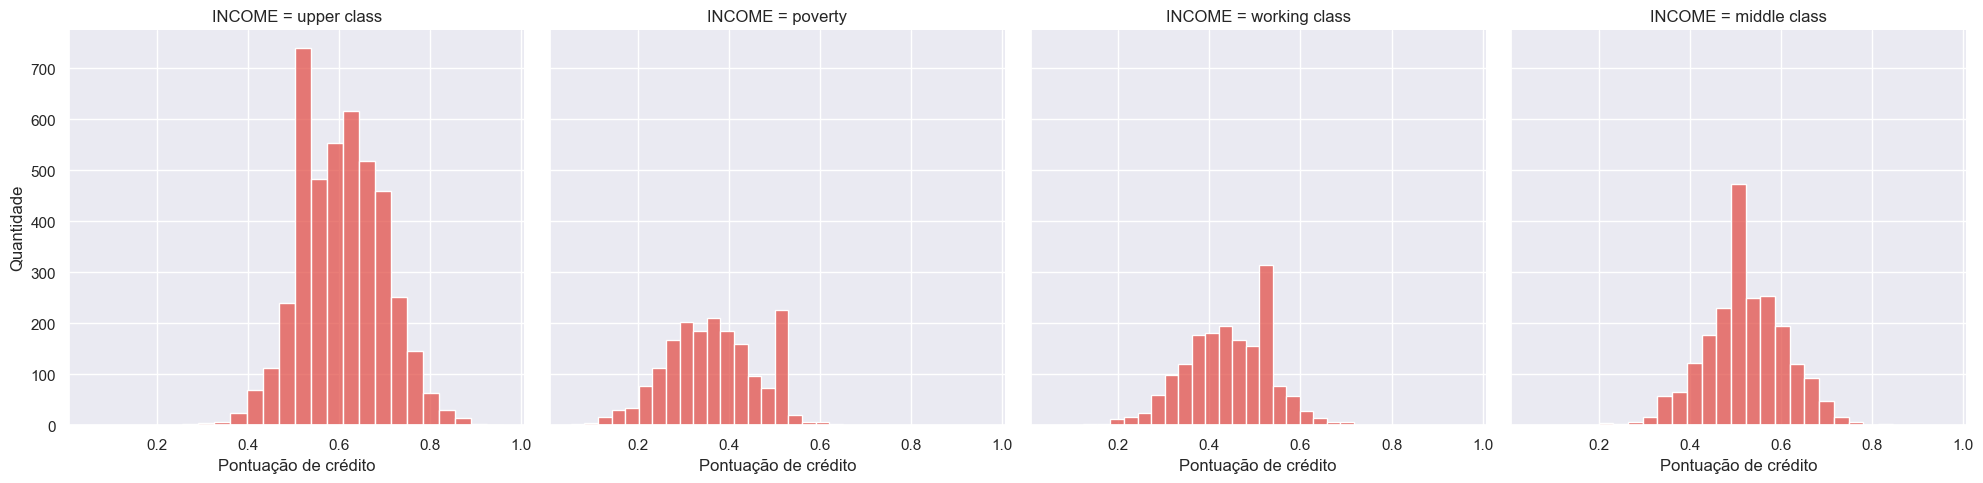

In [259]:
g = sns.FacetGrid(insurance, col='INCOME', height=5)
g.map(sns.histplot, 'CREDIT_SCORE', bins=20).set(xlabel='Pontua√ß√£o de cr√©dito', ylabel='Quantidade')

Vemos que existe sim uma grande diferen√ßa entre cada tipo de renda quando se trata do qu√£o bom pagador o indiv√≠duo √©. Pessoas com renda alta s√£o as que mais pagam em dia, enquanto pessoas com renda baixa s√£o as que mais atrasam os pagamentos.

Podemos analisar isso mais estatisticamente pela tabela abaixo, que mostra a m√©dia de pontos de cr√©dito de cada tipo de renda, al√©m de outros dados estat√≠sticos:

In [260]:
insurance.filter(['CREDIT_SCORE', 'INCOME']).groupby('INCOME').describe()

CREDIT_SCORE                                                    \
                     count      mean       std       min       25%       50%   
INCOME                                                                         
middle class        2138.0  0.522884  0.087848  0.199586  0.468203  0.515813   
poverty             1814.0  0.365135  0.100344  0.053358  0.293516  0.361944   
upper class         4336.0  0.604808  0.091803  0.255837  0.525999  0.605061   
working class       1712.0  0.441239  0.092086  0.123795  0.376898  0.446061   

                                   
                    75%       max  
INCOME                             
middle class   0.580780  0.844769  
poverty        0.436496  0.650351  
upper class    0.670612  0.960819  
working class  0.515813  0.717091

No caso da renda de pobreza, a m√©dia foi de 0.36 na pontua√ß√£o de cr√©dito, enquanto que na classe alta foi de 0.60. Vale notar tamb√©m que a pontua√ß√£o m√°xima de cr√©dito da classe baixa foi de 0.65, quase a mesma pontua√ß√£o **da m√©dia** da classe alta.

A m√©dia de pontos de cr√©dito segue na ordem de renda: classe baixa < classe trabalhadora < classe m√©dia < classe alta.

#### Rela√ß√£o Renda x Filhos

Analisar a rela√ß√£o entre <font color='yellow'>renda</font> e <font color='yellow'>filhos</font> √© interessante pois nos permite avaliar a Teoria Reformista (ou Marxista), que diz que a pobreza causa a superpopula√ß√£o, ou seja, pessoas pobres tendem a ter mais filhos. Vamos analisar isso:

O par√¢metro <font color='skyblue'>hue</font> relaciona o <font color='yellow'>INCOME</font> com <font color='yellow'>CHILDREN</font>, onde o eixo y representa a quantidade de <font color='yellow'>CHILDREN</font> para cada <font color='yellow'>INCOME</font>.

O par√¢metro <font color='skyblue'>multiple</font> faz com que as barras fiquem organizadas uma ao lado da outra, seguindo a ordena√ß√£o do eixo x.

O par√¢metro <font color='skyblue'>shrink</font> faz com que as barras fiquem mais pr√≥ximas umas das outras.

O par√¢metro <font color='skyblue'>palette</font> muda a cor das barras.

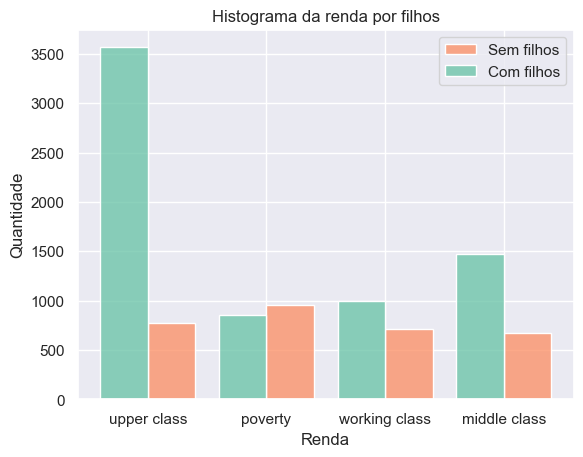

In [261]:
sns.histplot(data=insurance, x='INCOME', hue='CHILDREN', multiple='dodge', shrink=0.8, palette='Set2').set(title='Histograma da renda por filhos', xlabel='Renda', ylabel='Quantidade')

plt.legend(['Sem filhos', 'Com filhos'])

Pelo gr√°fico, podemos inferir que o tipo de renda que mais possui filhos √© a classe alta, podendo ser devido ao fato de que pessoas dessa renda possuem mais condi√ß√µes de sustentar uma fam√≠lia maior. Por outro lado, a classe baixa √© a que menos possui filhos, o que pode ser explicado pelo fato de que pessoas dessa renda possuem menos condi√ß√µes de sustentar uma fam√≠lia maior. Contrariando a Teoria Reformista, citada no come√ßo.

*OBS:* Vale lembrar que apenas esses dados n√£o s√£o suficientes para afirmar que a Teoria Reformista √© falsa, pois n√£o analisamos outros fatores que podem influenciar na quantidade de filhos, como por exemplo a educa√ß√£o, a religi√£o e a cultura. Mas esse n√£o √© o prop√≥sito dessa an√°lise.

### Pontos de cr√©dito

Para analisar os <font color='yellow'>pontos de cr√©ditos</font> individualmente usarei um histograma colorido, tanto por est√©tica quanto pela melhor visualiza√ß√£o dos dados:

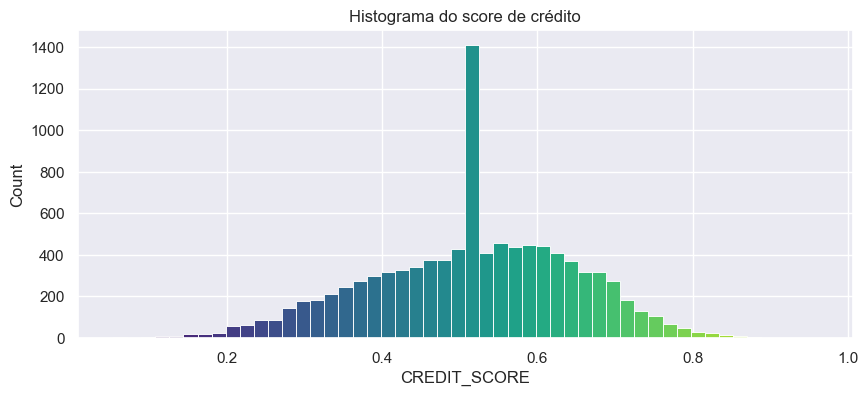

In [262]:
cm = sns.color_palette("viridis",50) #Cria uma paleta de cores com 50 tons de verde (baseado na paleta viridis)
plot = sns.histplot(x='CREDIT_SCORE',data=insurance, bins=50)
plot.figure.set_size_inches(10,4) #Define o tamanho do gr√°fico

for bin_,i in zip(plot.patches,cm): #Processo para colorir os bins
    bin_.set_facecolor(i)

plt.title("Histograma do score de cr√©dito")
plt.show()

Podemos notar que a desvatadora maioria dos pontos de cr√©dito se encontra pr√≥ximo de 0.5, o que indica um pagador m√©dio. Ademais, a quantidade de pontos de cr√©ditos maiores que 0.5 √© maior do que a quantidade de pontos de cr√©ditos menores, o que indica que a maioria dos indiv√≠duos s√£o bons pagadores.

#### Rela√ß√£o G√™nero x Pontos de cr√©dito

Uma an√°lise interessante a se fazer √© a rela√ß√£o entre <font color='yellow'>g√™nero</font> e <font color='yellow'>pontos de cr√©dito</font>. Vamos analisar se as mulheres s√£o melhores pagadoras do que os homens:

CREDIT_SCORE                                                    \
              count      mean       std       min       25%       50%   
GENDER                                                                  
female       5010.0  0.525922  0.129773  0.053358  0.443756  0.515813   
male         4990.0  0.505663  0.130958  0.060867  0.417905  0.515813   

                            
             75%       max  
GENDER                      
female  0.617328  0.915883  
male    0.598641  0.960819

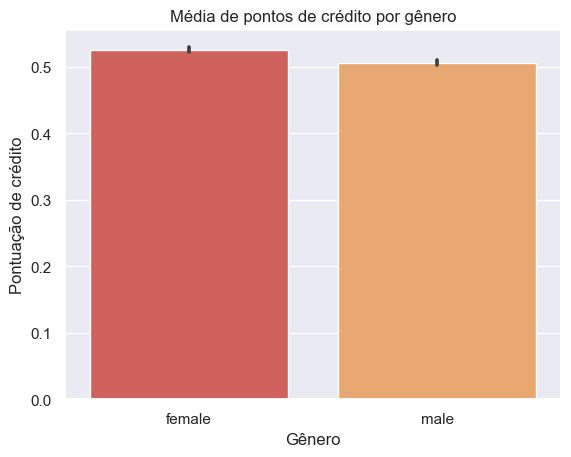

In [263]:
sns.barplot(data=insurance, x='GENDER', y='CREDIT_SCORE').set(title='M√©dia de pontos de cr√©dito por g√™nero', xlabel='G√™nero', ylabel='Pontua√ß√£o de cr√©dito')

insurance.filter(['CREDIT_SCORE', 'GENDER']).groupby('GENDER').describe()

Ao olhar a m√©dia dos scores dos g√™neros, percebemos que as mulheres realmente pagam melhor do que os homens, o que pode ser explicado pelo fato de que as mulheres possuem mais cuidado com o dinheiro, e tamb√©m por que elas possuem mais cuidado com o ve√≠culo (vimos isso em uma an√°lise anterior).

### Propriedade do ve√≠culo

Para essa an√°lise usaremos o par√¢metro <font color='skyblue'>stat</font> para analisar a propor√ß√£o de indiv√≠duos <font color='yellow'>propriet√°rios do ve√≠culo</font>:

[Text(0.5, 1.0, 'Propor√ß√£o da propriedade de ve√≠culo'),
 Text(0.5, 0, 'Propriedade de ve√≠culo'),
 Text(0, 0.5, 'Propor√ß√£o')]

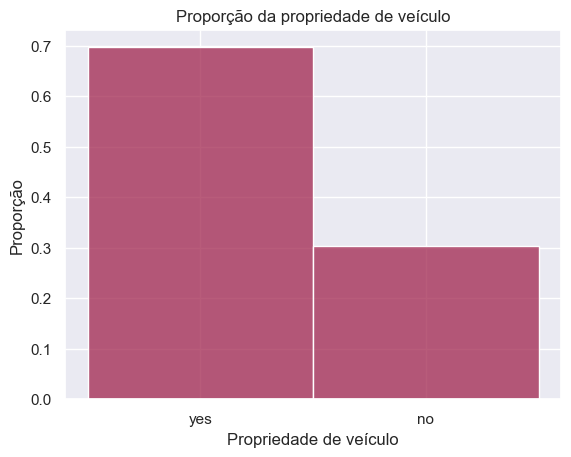

In [264]:
sns.histplot(data=insurance, x='VEHICLE_OWNERSHIP', stat='proportion', color='#a1254e').set(title='Propor√ß√£o da propriedade de ve√≠culo', xlabel='Propriedade de ve√≠culo', ylabel='Propor√ß√£o')

Nos dados registrados no dataset, cerca de 65% dos indiv√≠duos eram donos do ve√≠culo, enquanto que 35% n√£o eram. 

### Ano do ve√≠culo

√â importante an√°lisarmos o <font color='yellow'>ano do ve√≠culo</font>, visto que as pe√ßas do ve√≠culo podem sofrer desgastes naturais com o tempo, aumentando a probabilidade de ocorrer um acidente no tr√¢nsito. Para isso, vamos observar o histograma dos anos dos ve√≠culos:

[Text(0.5, 1.0, 'Propor√ß√£o do ano do ve√≠culo'),
 Text(0.5, 0, 'Ano do ve√≠culo'),
 Text(0, 0.5, 'Propor√ß√£o')]

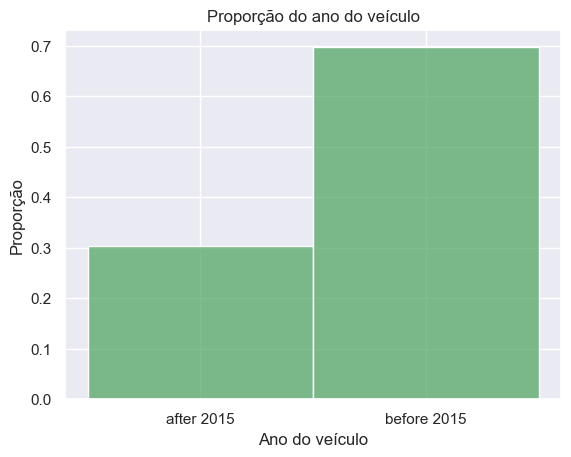

In [265]:
sns.histplot(data=insurance, x='VEHICLE_YEAR', stat='proportion', color='g').set(title='Propor√ß√£o do ano do ve√≠culo', xlabel='Ano do ve√≠culo', ylabel='Propor√ß√£o')

Percebemos ent√£o pelo gr√°fico que a maioria dos pedidos de indeniza√ß√£o foram feitos por ve√≠culos com mais tempo de uso, o que enfatiza o fato dos acidentes serem mais comuns em ve√≠culos mais velhos.

### Estado Civil

No dataset, o <font color='yellow'>estado civil</font> representa se o indiv√≠duo √© casado ou n√£o. Podemos ver pelo gr√°fico abaixo que a distribui√ß√£o √© bem equilibrada, portanto n√£o podemos inferir nenhuma informa√ß√£o olhando para a feature individualmente.

[Text(0.5, 1.0, 'Histograma do Estado Civil'),
 Text(0.5, 0, 'Casado(a)'),
 Text(0, 0.5, 'Quantidade')]

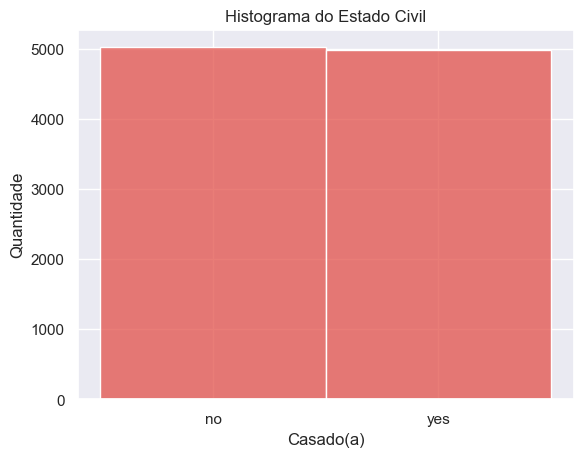

In [266]:
sns.histplot(insurance, x='MARRIED').set(title='Histograma do Estado Civil', xlabel='Casado(a)', ylabel='Quantidade')

#### Rela√ß√£o Estado Civil x Filhos

Uma an√°lise interessante para realizarmos √© sobre a rela√ß√£o entre <font color='yellow'>estado civil</font> e <font color='yellow'>filhos</font>. Vamos analisar se pessoas casadas tendem a ter mais filhos do que pessoas n√£o declaradas casadas:

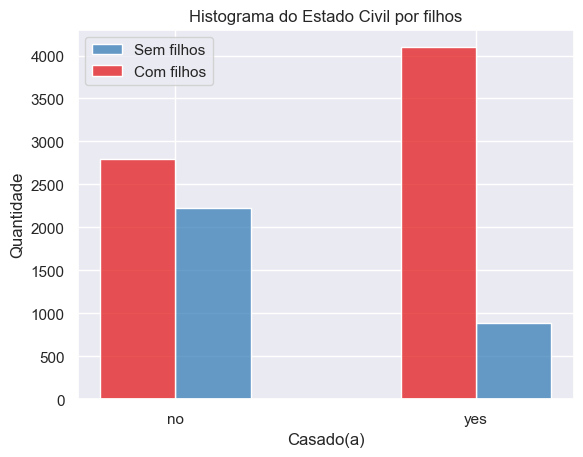

In [267]:
sns.histplot(data=insurance, x='MARRIED', hue='CHILDREN', multiple='dodge', shrink=0.5, palette='Set1').set(title='Histograma do Estado Civil por filhos', xlabel='Casado(a)', ylabel='Quantidade')

plt.legend(['Sem filhos', 'Com filhos'])

Realmente, pessoas casadas s√£o as que mais possuem filhos, por√©m vale notar tamb√©m que pessoas n√£o-casadas ainda assim possuem um n√∫mero consider√°vel de filhos. Isso pode ser explicado pelo fato de que pessoas n√£o-casadas podem ter filhos e ent√£o se divorciar, ou ent√£o terem filhos sem se casar.

#### Rela√ß√£o Estado Civil x Renda

Podemos tamb√©m analisar como o <font color='yellow'>estado civil</font> se comporta em cada <font color='yellow'>renda</font>. Para isso faremos o gr√°fico de barras abaixo:

([<matplotlib.axis.XTick at 0x16e02667d90>,
 [Text(0, 0, 'N√£o'), Text(1, 0, 'Sim')])

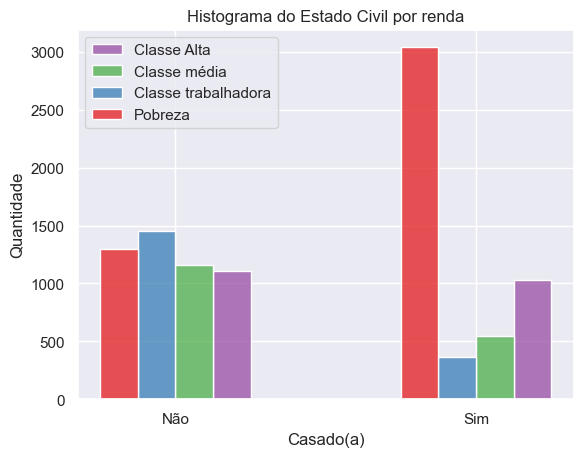

In [268]:
sns.histplot(data=insurance, x='MARRIED', hue='INCOME', multiple='dodge', shrink=0.5, palette='Set1').set(title='Histograma do Estado Civil por renda', xlabel='Casado(a)', ylabel='Quantidade')

plt.legend(['Classe Alta', 'Classe m√©dia', 'Classe trabalhadora', 'Pobreza'])
plt.xticks([0,1], ['N√£o', 'Sim'])

Podemos ver que a classe alta √© a que mais possui pessoas casadas, em contra partida, a classe baixa √© a que menos possui pessoas casadas. Isso pode ser explicado pelo fato de que pessoas com renda alta possuem mais condi√ß√µes comprar/alugar uma casa, pagar contas, etc. Enquanto que pessoas com renda baixa possuem menos condi√ß√µes de realizar tais coisas.

### Filhos

Na an√°lise individual dos <font color='yellow'>filhos</font>, podemos ver que a maioria dos indiv√≠duos possui filhos, como mostra o gr√°fico abaixo:

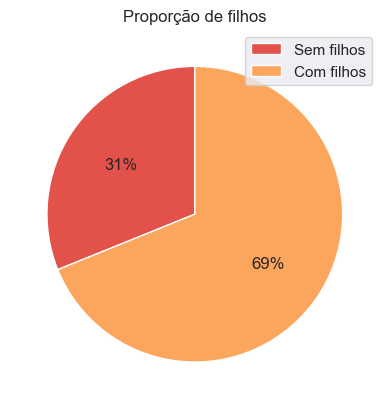

In [269]:
plt.pie(insurance.filter(['ID', 'CHILDREN']).groupby('CHILDREN').count()['ID'], autopct='%.0f%%', startangle=90)
plt.title('Propor√ß√£o de filhos')
plt.legend(['Sem filhos', 'Com filhos'])
plt.show()

#### Rela√ß√£o Filhos x Acidentes Passados

Uma curiosidade interessante √© se pessoas com <font color='yellow'>fihos</font> tendem a ter mais <font color='yellow'>acidentes passados</font> do que pessoas sem filhos. Vamos analisar isso:

([<matplotlib.axis.XTick at 0x16e02741e20>,
 [Text(0, 0, 'Com filhos'), Text(1, 0, 'Sem filhos')])

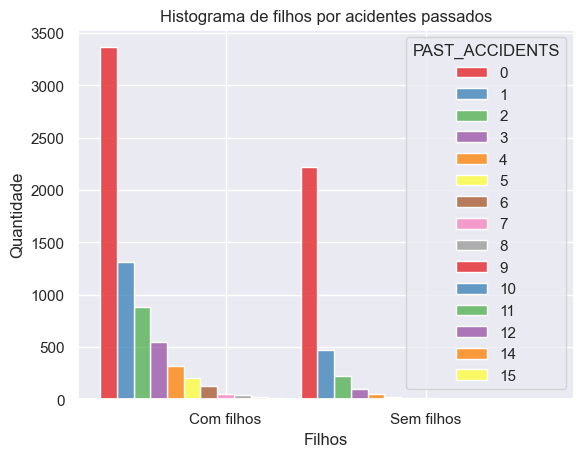

In [270]:
fg = sns.histplot(insurance, x='CHILDREN', hue='PAST_ACCIDENTS', multiple='dodge', shrink=1.25, palette='Set1').set(title='Histograma de filhos por acidentes passados', xlabel='Filhos', ylabel='Quantidade')

plt.xticks([0,1],['Com filhos', 'Sem filhos'])

An√°lisando o gr√°fico, percebemos que pessoas com filhos tendem a ter mais acidentes do que pessoas sem filhos. Isso pode ser causado pelo estresse que as pessoas com filhos possuem, pois elas precisam se preocupar com a educa√ß√£o dos filhos, sa√∫de, alimenta√ß√£o, etc. Isso pode causar estresse e consequentemente acidentes.

### Localidade

Saber a <font color='yellow'>localidade</font> da maioria dos pedidos de indeniza√ß√£o √© importante para que a seguradora possa saber onde focar seus esfor√ßos para melhorar a qualidade do servi√ßo prestado. Para isso, vamos analisar o gr√°fico abaixo:

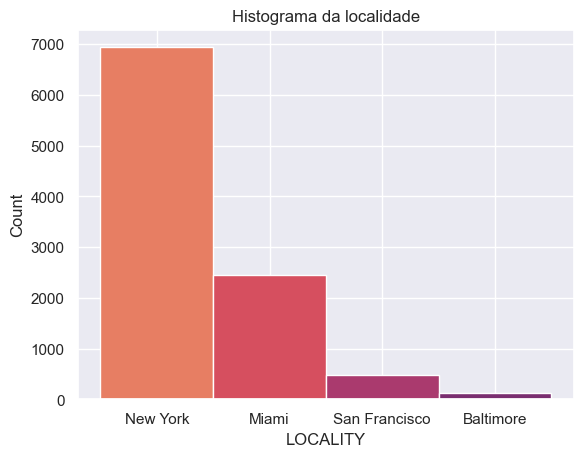

In [271]:
cm = sns.color_palette("flare",4)
    
plot = sns.histplot(x='LOCALITY',data=insurance, bins=4)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.title('Histograma da localidade')
plt.show()

Podemos ver que New York City √© a cidade com mais pedidos de indeniza√ß√£o. Isso pode ser explicado pelo fato de que a cidade √© uma das mais populosas dos Estados Unidos, e portanto, possue mais indiv√≠duos que podem ter um acidente de carro ou roubo.

#### Rela√ß√£o Localidade x Acidentes passados

Saber o local onde mais aconteceram acidentes √© importante tanto para a seguradora quanto para pessoas interessadas em saber onde √© mais seguro dirigir. Para isso, vamos analisar o gr√°fico abaixo:

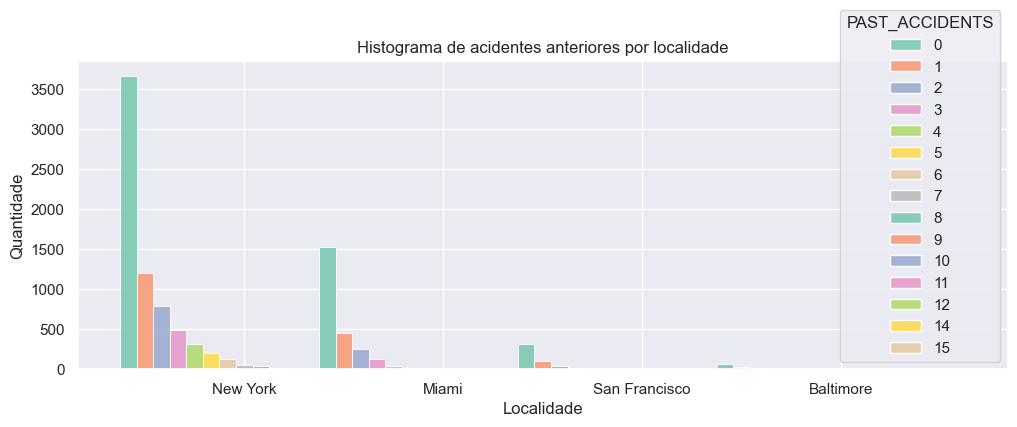

In [272]:
sns.histplot(data=insurance, x='LOCALITY', hue='PAST_ACCIDENTS', multiple='dodge', shrink=1.25, palette='Set2').set(title='Histograma de acidentes anteriores por localidade', xlabel='Localidade', ylabel='Quantidade')
plt.gcf().set_size_inches(12,4) #Define o tamanho do gr√°fico

Podemos ver que novamente New York City se destaca, agora por ser a cidade com mais acidentes passados. Inclusive tendo mais acidentes do que a soma dos acidentes das outras cidades no dataset.

### Quilometragem anual percorrida

Saber qual a <font color='yellow'>quilometragem anual percorrida</font> entre os invdiv√≠duos √© importante para sabermos qual √© a quilometragem anual em que os acidentes come√ßam a ser frequentes. Para isso, vamos analisar o gr√°fico abaixo:

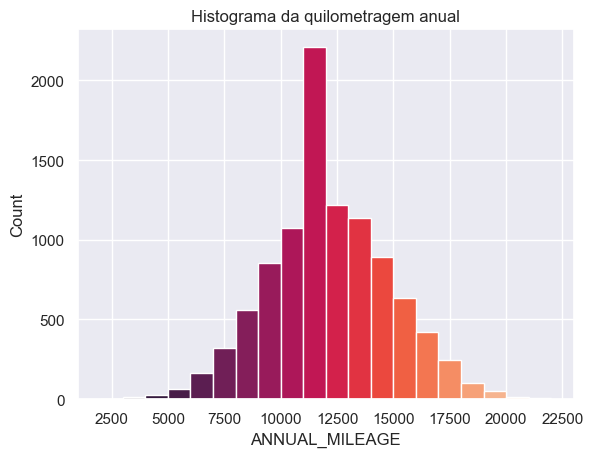

In [273]:
cm = sns.color_palette("rocket",20)
plot = sns.histplot(x='ANNUAL_MILEAGE',data=insurance, bins=20)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.title("Histograma da quilometragem anual")
plt.show()

Podemos descobrir qual √© a moda dos dados, ou seja, o valor de quilometragem anual mais frequente, pelo m√©todo <font color='skyblue'>mode()</font>:

In [274]:
print("Moda da quilometragem anual: " + str(insurance['ANNUAL_MILEAGE'].mode()))

Moda da quilometragem anual: 0    11000.0
Name: ANNUAL_MILEAGE, dtype: float64


Como podemos ver, a moda √© 11.000 km, ou seja, s√£o mais frequentes pedidos de indeniza√ß√£o por acidentes/roubos de ve√≠culos com essa quilometragem anual percorrida.

### Tipo de ve√≠culo

J√° realizamos uma an√°lise parcial dos <font color='yellow'>tipos de ve√≠culos</font> mais frequentes no nosso dataset anteriormente, mas agora vamos analisar a propor√ß√£o de cada tipo de ve√≠culo:

[Text(0.5, 1.0, 'Propor√ß√£o do tipo de ve√≠culo'),
 Text(0.5, 0, 'Tipo de ve√≠culo'),
 Text(0, 0.5, 'Propor√ß√£o')]

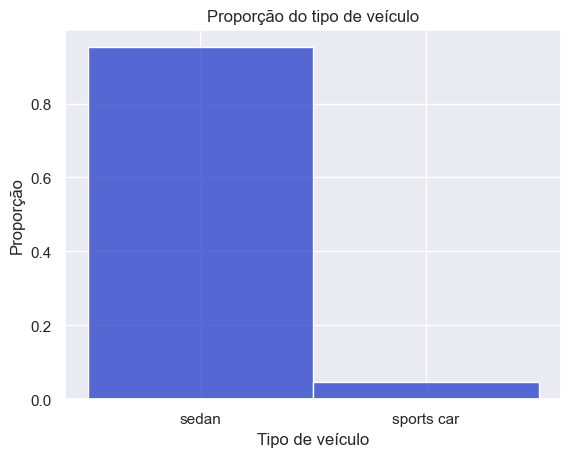

In [275]:
sns.histplot(insurance, x='VEHICLE_TYPE', stat='proportion', color='#233BC9').set(title='Propor√ß√£o do tipo de ve√≠culo', xlabel='Tipo de ve√≠culo', ylabel='Propor√ß√£o')

Pelo gr√°fico podemos verificar que os carros esportivos representam uma fra√ß√£o min√∫scula do total de ve√≠culos, enquanto que os carros familiares representam a grande maioria. Isso pois carros familiares s√£o mais acess√≠veis e mais comuns do que carros esportivos, como dito anteriormente na an√°lise.

#### Rela√ß√£o Tipo de ve√≠culo x Viola√ß√µes de velocidade

Ser√° que s√≥ porque o carro √© esportivo quer dizer que ele √© mais propenso a <font color='yellow'>viola√ß√µes de velocidade</font>? Vamos analisar isso:

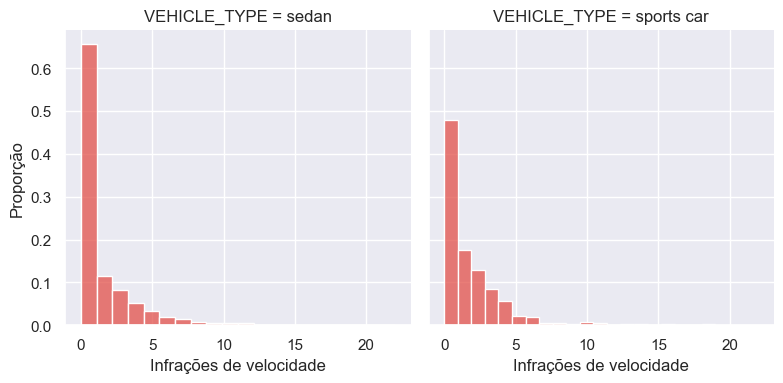

In [276]:
g = sns.FacetGrid(insurance, col='VEHICLE_TYPE', height=4)
g.map(sns.histplot, 'SPEEDING_VIOLATIONS', stat='proportion', bins=20).set(xlabel='Infra√ß√µes de velocidade', ylabel='Propor√ß√£o')

Realmente, carros esportivos possuem proporcionalmente mais viola√ß√µes de velocidade do que carros familiares. Ali√°s, quem n√£o quer correr com um carro esportivo? √â muito mais divertido do que dirigir um carro familiar.

### DUIS

√â comum pessoas cometerem acidentes de tr√¢nsito por estarem embriagadas, por√©m as seguradoras n√£o cobrem os preju√≠zos de acidentes causados por embriaguez. Vamos analisar ent√£o o gr√°fico abaixo:

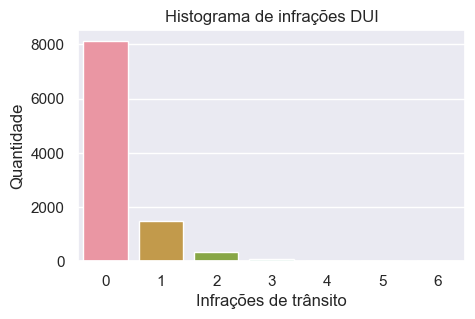

In [277]:
sns.countplot(insurance, x='DUIS').set(title='Histograma de infra√ß√µes DUI', xlabel='Infra√ß√µes de tr√¢nsito', ylabel='Quantidade')
plt.gcf().set_size_inches(5,3)

Podemos tamb√©m visualizar os dados pela tabela abaixo:

In [278]:
insurance.filter(['ID', 'DUIS']).groupby('DUIS').count()

ID
DUIS      
0     8118
1     1470
2      331
3       68
4       10
5        2
6        1

Como podemos ver, a maioria dos indiv√≠duos n√£o possuem DUIS, talvez porque saibam que a seguradora n√£o ir√° cobrir os preju√≠zos causados por acidentes de tr√¢nsito causados por embriaguez. Por√©m ainda assim foram registrados 2.392 casos de DUIS nos registros dos indiv√≠duos, o que √© um n√∫mero consider√°vel.

#### Rela√ß√£o DUIS x Acidentes passados

Uma an√°lise a se fazer √© se os <font color='yellow'>acidentes passados</font> dos indiv√≠duos s√£o acompanhados por <font color='yellow'>DUIS</font>. Vamos analisar isso:

[Text(0.5, 1.0, 'Histograma de acidentes anteriores por infra√ß√µes DUI'),
 Text(0.5, 0, 'Acidentes anteriores'),
 Text(0, 0.5, 'Propor√ß√£o')]

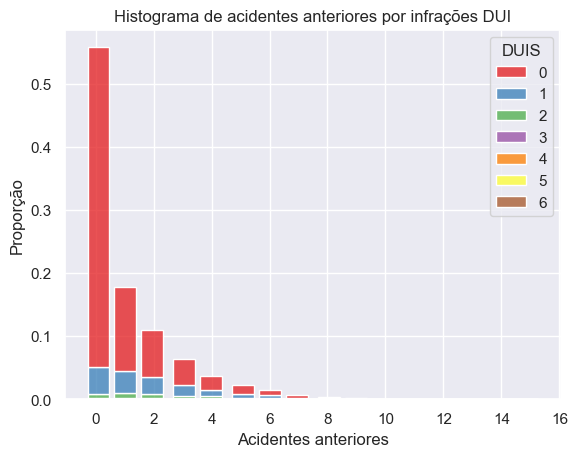

In [279]:
sns.histplot(insurance, x='PAST_ACCIDENTS', hue='DUIS', multiple='stack', stat='proportion', shrink=4, palette='Set1').set(title='Histograma de acidentes anteriores por infra√ß√µes DUI', xlabel='Acidentes anteriores', ylabel='Propor√ß√£o')

Podemos ver que grande parte dos acidentes passados n√£o s√£o acompanhados por DUIS, por√©m conforme o n√∫mero de acidentes vai aumentando, a porpor√ß√£o acidentes/DUIS tamb√©m aumenta. Isso significa que quanto mais acidentes o indiv√≠duo teve, maior √© a chance de algum deles ter sido por embriaguez.

## An√°lise de Outcome

Nesta se√ß√£o irei analisar a correla√ß√£o com a coluna <font color='yellow'>Outcome</font> com as outras features j√° analisadas, pois assim saberemos quais fatores mais influenciam quando a seguradora aprova a indeniza√ß√£o do indiv√≠duo.

### Rela√ß√£o Outcome: Pontos de Cr√©dito

Para come√ßar, vamos analisar a correla√ß√£o entre <font color='yellow'>pontos de cr√©dito</font> e a aprova√ß√£o da indeniza√ß√£o (ou <font color='yellow'>Outcome</font>) pelo gr√°fico a seguir:

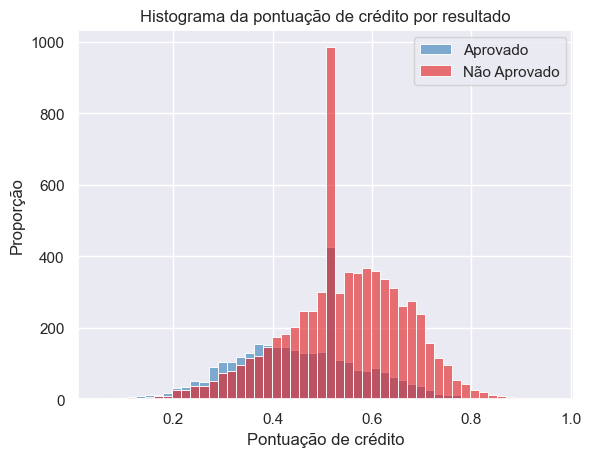

In [280]:
#make a graph that relates credit score with the outcome
sns.histplot(insurance, x='CREDIT_SCORE', hue='OUTCOME', alpha=0.6, bins=50, palette='Set1').set(title='Histograma da pontua√ß√£o de cr√©dito por resultado', xlabel='Pontua√ß√£o de cr√©dito', ylabel='Propor√ß√£o')

plt.legend(['Aprovado', 'N√£o Aprovado'])

Podemos perceber que, conforme os pontos de cr√©dito do indiv√≠duo s√£o grandes, a chance de ele ter a indeniza√ß√£o aprovada √© maior (lembrando que n√£o √© garantido, pois ainda assim existem casos em que o ind√≠viduo √© um bom pagador mas a indeniza√ß√£o √© reprovada).

O motivo pela seguradora escolher um indiv√≠duo com uma alta pontua√ß√£o de cr√©dito √© porque torna-se vantajoso essa escolha, pois a seguradora sabe que o indiv√≠duo continuar√° pagando as parcelas do seguro, pois caso o contr√°rio, a seguradora pode acabar perdendo dinheiro com o seguro do indiv√≠duo.

### Rela√ß√£o Outcome: Experi√™ncia do Motorista e Escolaridade

Vamos analisar agora a rela√ß√£o que o <font color='yellow'>Outcome</font> tem com a <font color='yellow'>experi√™ncia do motorista</font> e a <font color='yellow'>escolaridade</font> do mesmo:

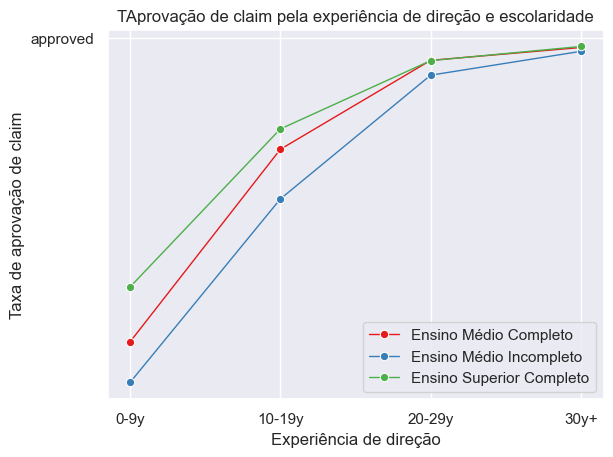

In [286]:
sns.lineplot(insurance, x='DRIVING_EXPERIENCE', y='OUTCOME', hue='EDUCATION', palette='Set1', lw=1, marker='o', errorbar=None).set(title="TAprova√ß√£o de claim pela experi√™ncia de dire√ß√£o e escolaridade", xlabel="Experi√™ncia de dire√ß√£o", ylabel="Taxa de aprova√ß√£o de claim")

plt.legend(["Ensino M√©dio Completo", "Ensino M√©dio Incompleto","Ensino Superior Completo"])
plt.gca().invert_yaxis() #inverte o eixo y para que os valores de aprova√ß√£o sejam crescentes

O gr√°fico est√° representado da seguinte forma: no eixo x temos as categorias de experi√™ncia de dire√ß√£o, no eixo y temos a taxa de aprova√ß√£o (quanto mais acima do gr√°fico, mais aprova√ß√£o teve) da indeniza√ß√£o e as linhas representam a taxa de aprova√ß√£o da indeniza√ß√£o para cada categoria de escolaridade.

Podemos ver pelo gr√°fio que a seguradora t√™m prefer√™ncia pelos motoristas com mais experi√™ncia e com escolaridade cada vez melhor (ou seja, quanto melhor a escolaridade do invid√≠vuo, maior a chance de ele ter a indeniza√ß√£o aprovada). Por√©m o fator que mais mostra influ√™ncia na taxa de aprova√ß√£o √© a experi√™ncia, pois conforme a experi√™ncia do indiv√≠duo √© maior, as taxas de aprova√ß√£o s√£o maiores tamb√©m, sendo que a escolaridade apenas acompanha ambos.

### Rela√ß√£o Outcome: Idade

Verificamos anteriormente que a <font color='yellow'>experi√™ncia do motorista</font> √© um fator importante para a seguradora aprovar a indeniza√ß√£o, mas ser√° que a <font color='yellow'>idade</font> tamb√©m influencia? Vamos analisar isso:

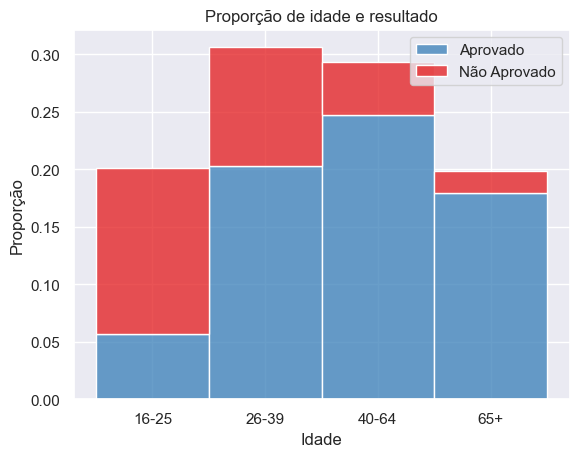

In [282]:
insurance.sort_values(by='AGE', inplace=True)
sns.histplot(insurance, x='AGE', hue='OUTCOME', multiple='stack', stat='proportion', palette='Set1').set(title='Propor√ß√£o de idade e resultado', xlabel='Idade', ylabel='Propor√ß√£o')

plt.legend(["Aprovado", "N√£o Aprovado"])

Neste gr√°fico estamos ordenando a propor√ß√£o dos casos de indeniza√ß√£o aprovados e reprovados por idade. Podemos ver que a propor√ß√£o de casos aprovados √© maior para indiv√≠duos com idade mais avan√ßada, ou seja, quanto mais velho o indiv√≠duo, maior a chance de ele ter a indeniza√ß√£o aprovada. Isso √© de se esperar, pois indiv√≠duos mais velhos tendem a ter mais experi√™ncia de dire√ß√£o, o que foi visto como um fator importante para a seguradora.

### Propriet√°rio do Ve√≠culo x Renda

Ser√° que a seguradora tem prefer√™ncia por indiv√≠duos que possuem um ve√≠culo pr√≥prio? E quanto aos indiv√≠duos que possuem renda alta? Vamos analisar os dois fatores (<font color='yellow'>propriedade do ve√≠culo</font> e <font color='yellow'>renda</font>) juntos, como fizemos na *rela√ß√£o outcome: experi√™ncia do motorista e escolaridade*:

([<matplotlib.axis.XTick at 0x16e0381db80>,
 [Text(0, 0, 'Pobreza'),
  Text(1, 0, 'Classe trabalhadora'),
  Text(2, 0, 'Classe m√©dia'),
  Text(3, 0, 'Classe alta')])

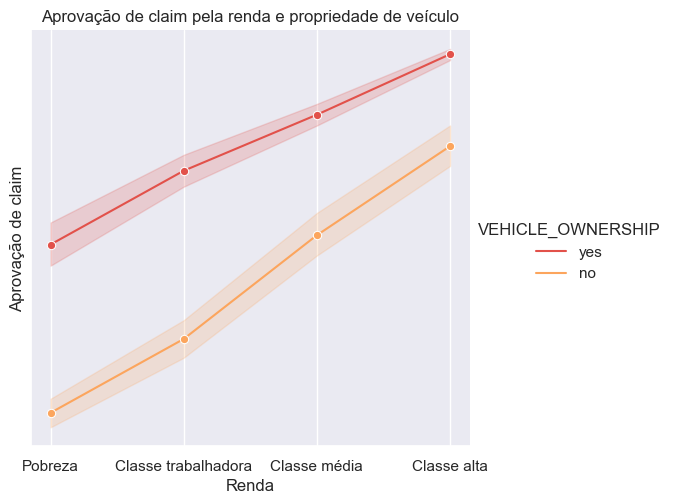

In [283]:
sns.relplot(insurance, kind='line', x='INCOME', y='OUTCOME', hue='VEHICLE_OWNERSHIP', marker='o').set(title='Aprova√ß√£o de claim pela renda e propriedade de ve√≠culo', xlabel='Renda', ylabel='Aprova√ß√£o de claim')
plt.gca().invert_yaxis() #Inverte o eixo y, pois o gr√°fico estava invertido

plt.xticks([0,1,2,3],['Pobreza','Classe trabalhadora','Classe m√©dia','Classe alta'])

Podemos ver pelo gr√°fico que a renda do indiv√≠duo interfere sim na aprova√ß√£o da claim, pois conforme a renda do indiv√≠duo aumenta, a taxa de aprova√ß√£o tamb√©m aumenta. Por√©m, o fator de propriedade do ve√≠culo tem influ√™ncia tamb√©m, pois a linha dos ve√≠culos n√£o pr√≥prios √© mais baixa que a linha dos ve√≠culos pr√≥prios, o que significa que a taxa de aprova√ß√£o √© menor para indiv√≠duos que n√£o possuem um ve√≠culo pr√≥prio.

Uma observa√ß√£o interessante a se tirar do gr√°fico √© que a taxa de aprova√ß√£o para indiv√≠duos **pobres** e **propriet√°rio do ve√≠culo** tem uma taxa equivalente ao de indiv√≠duos da **classe m√©dia** e **n√£o propriet√°rio do ve√≠culo**. Mostrando como o fator de renda √© importante para a seguradora.

### Rela√ß√£o Outcome: G√™nero

Nesta rela√ß√£o iremos analisar se a feature <font color='yellow'>g√™nero</font> influencia na aprova√ß√£o da indeniza√ß√£o. Vamos usar um histograma de densidade para analisar a rela√ß√£o das colunas:

([<matplotlib.axis.YTick at 0x16e0507aa90>,
 [Text(0, 0, 'N√£o Aprovado'), Text(0, 1, 'Aprovado')])

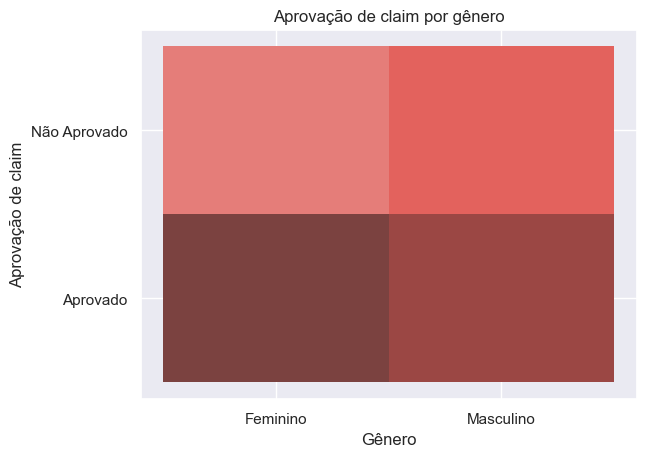

In [287]:
sns.histplot(insurance, x='GENDER', y='OUTCOME', stat='density').set(title='Aprova√ß√£o de claim por g√™nero', xlabel='G√™nero', ylabel='Aprova√ß√£o de claim')

plt.xticks([0,1],['Feminino', 'Masculino'])
plt.yticks([0,1],['N√£o Aprovado', 'Aprovado'])

Para interpretar o diagrama, temos que ter em mente que quanto **mais escuro** a parte do histograma, **mais casos** do tipo tiveram. Por exemplo, no gr√°fico acima, podemos ver que a taxa de aprova√ß√£o de indeniza√ß√£o √© maior para indiv√≠duos do g√™nero feminino. Al√©m disso, a menor taxa de reprova√ß√£o √© para ind√≠viduos do g√™nero feminino (pois √© a parte mais clara).

√â importante lembrar que quando analisamos a feature <font color='yellow'>g√™nero</font> individualmente, verificamos que a distribui√ß√£o dos g√™neros estava equilibrada, ent√£o o nosso resultado neste gr√°fico de rela√ß√£o n√£o est√° inviesado.

Vimos tamb√©m na an√°lise da rela√ß√£o entre <font color='yellow'>g√™nero</font> e <font color='yellow'>acidentes passados</font> que indiv√≠duos do g√™nero feminino possuem menos acidentes no hist√≥rico, mostrando que realmente a seguradora tem prefer√™ncia de cobrir os acidentes das mulheres, por ser mais vantajoso.

### Rela√ß√£o Outcome: Quilometragem Anual e Ano do Ve√≠culo

A <font color='yellow'>quilometragem anual</font> do ve√≠culo nos diz o quanto o motorista usa o carro por ano e, quanto mais o indiv√≠duo usa o carro, maior a chance de acontecer um acidente. Por isso, a seguradora pode ter interesse em saber a quilometragem anual do indiv√≠duo.

Podemos analisar a rela√ß√£o do <font color='yellow'>ano do ve√≠culo</font> com a taxa de aprova√ß√£o tamb√©m, ser√° que a seguradora tem prefer√™ncia por ve√≠culos mais novos? Vamos analisar tanto o caso da quilometragem quanto o do ano do ve√≠culo:

([<matplotlib.axis.YTick at 0x16e0391edf0>,
 [Text(0, 0, 'N√£o aprovado'), Text(0, 1, 'Aprovado')])

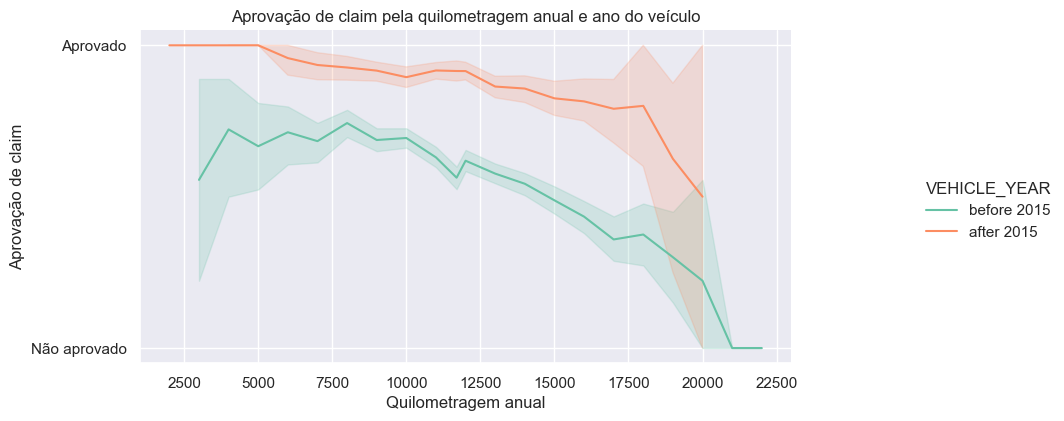

In [285]:
sns.relplot(insurance, kind='line', x='ANNUAL_MILEAGE', y='OUTCOME', hue='VEHICLE_YEAR', palette='Set2').set(title="Aprova√ß√£o de claim pela quilometragem anual e ano do ve√≠culo", xlabel="Quilometragem anual", ylabel="Aprova√ß√£o de claim")
plt.gca().invert_yaxis()

plt.gcf().set_size_inches(12,4)
plt.yticks([0,1],['N√£o aprovado', 'Aprovado'])

Podemos ver que, conforme a quilometragem anual do indiv√≠duo aumenta, suas chances de ter a indeniza√ß√£o aprovada diminuem. Isso √© de se esperar, pois quanto mais o indiv√≠duo usa o carro, maior a chance de acontecer um acidente e o seguro pagar mais caro pelo indiv√≠duo. Por√©m, √© importante notarmos tamb√©m que o ano do ve√≠culo teve um fator de influ√™ncia no gr√°fico. Observando podemos afirmar que a seguradora tem prefer√™ncia por ve√≠culos mais novos, dado que o gr√°fico de aprova√ß√£o dessa categoria est√° acima do que a categoria dos ve√≠culos mais antigos.

Isso acontece pois √© mais dif√≠cil para a seguradora cobrir danos de um ve√≠culo mais antigo, dado que, quando um acidente acontece, as partes velhas do ve√≠culo acabam sendo danificadas e, na maioria das vezes, essas partes nem s√£o mais fabricadas.

Al√©m de que modelos de carros mais caros s√£o vistos como lucro e rel√≠quia, sendo alvos frequentes de roubos e furtos. Esse fator √© contribuido tamb√©m pelo fato dos modelos mais antigos n√£o serem mais fabricados e assim valorizarem seu valor.

# Refer√™ncias

**1. Seaborn** (Youtube) - <a href='https://www.youtube.com/watch?v=aLAIyimXylg&t=356s'>Como fazer M√öLTIPLOS PLOTS no Seaborn (FacetGrid)</a>

**2. Matplotlib** (Youtube) - <a href='https://www.youtube.com/watch?v=1M65rAAcl5E&t=557s'>Stacked & Multiple Bar Graph Using Python üòç | Matplotlib Library | Step By Step Tutorial</a>

**3. Pandas (Histograma)** (Youtube) - <a href='https://www.youtube.com/watch?v=zNvxJNQhmRs'>Pandas Histogram | pd.DataFrame.hist()</a>

**4. Pandas (Barra)** (Youtube) - <a href='https://www.youtube.com/watch?v=lRPisI6kzLg'>Pandas Bar Plot | DataFrame.plot.bar()</a>

**5. Pandas (Groupby)** (Youtube) - <a href='https://www.youtube.com/watch?v=TRatkPjzHNE&t=238s'>O poder do GROUPBY (pacote Pandas)| An√°lise de dados #4</a>

**6. Seaborn (Plot)** (Stackoverflow) - <a href='https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot'>How to set x axis ticklabels in a seaborn plot</a>

**7. Visualiza√ß√£o de Dados** (Turing Talking) - <a href='https://medium.com/turing-talks/turing-talks-9-visualiza%C3%A7%C3%A3o-de-dados-93df670d479'>Data Science | Visualiza√ß√£o de Dados</a>

**8. Seguradoras pagam por acidentes por embriaguez?** (John Foy & Associates) - <a href='https://www.johnfoy.com/faqs/do-insurance-companies-pay-for-drunk-driving-accidents/'>Do Insurance Companies Pay for Drunk Driving Accidents?</a>

**9. Popularidade dos carros nos EUA** (Uol) - <a href='https://www.uol.com.br/carros/noticias/redacao/2021/06/23/por-que-carros-populares-nos-eua-viram-modelos-de-luxo-no-brasil.htm'>Por que carros 'populares' nos EUA viram modelos de luxo no Brasil</a>

**10. Paleta de cores** (Seaborn) - <a href='https://seaborn.pydata.org/tutorial/color_palettes.html'>Choosing color palettes</a>

**11. Rela√ß√µes estat√≠sticas entre vari√°veis** (Seaborn) - <a href='https://seaborn.pydata.org/tutorial/relational.html'>Visualizing statistical relationships</a>

**12. Como criar um gr√°fico de pizza** (Geeksforgeeks) - <a href='https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/'>How to Create a Pie Chart in Seaborn?</a>